# **Exploratory Data Analysis on 120 years of Olympics Data**

![](https://img.olympics.com/images/image/private/t_s_16_9_g_auto/t_s_w960/f_auto/primary/d1fpfljg04lwl1qje9rh)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns.

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

The following topics are covered in this prject:

Downloading a dataset from an online source
Data preparation and cleaning with Pandas
Open-ended exploratory analysis and visualization
Asking and answering interesting questions
Summarizing inferences and drawing conclusions

## Introduction
In this tutorial, we'll analyze the StackOverflow Developer Survey 2020 dataset. The dataset contains responses to an annual survey conducted by StackOverflow. You can find the official analysis of the data here: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

There are several options for getting a dataset into Jupyter:

- Download the CSV manually and upload it via Jupyter's GUI
- Use the `opendatasets` library to download datasets from Kaggle datasets and Google Drive URLs

We'll use the `opendatasets` helper library to download files from the above URL.

## Data Preprocessing & Cleaning with Pandas

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:

- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience, and preferences
- Employment-related information, preferences, and opinions

Let's select a subset of columns with the relevant data for our analysis.

Let's extract a copy of the data from these columns into a new data frame `athletes_df`. We can continue to modify further without affecting the original data frame.

### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

### Loading the Datasets

In [2]:
athletes = pd.read_csv("athlete_events.csv")
region = pd.read_csv("noc_regions.csv")

In [3]:
# Checking the first 5 rows of the dataset athlete

athletes.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
# Checking the first 5 rows of the dataset region

region.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

### Merging both the datasets

In [5]:
athletes_df = athletes.merge(region, how = 'left', on = 'NOC')
athletes_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

### Data Extraction

In [6]:
athletes_df.shape

(271116, 17)

In [7]:
# Making the columns consistent

athletes_df.rename(columns = {'region' : 'Region', 'notes' : 'Notes'}, inplace = True)
athletes_df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       Region Notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

In [8]:
# Checking the info

athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [9]:
# Lets use the describe function for displaying statistical summary

athletes_df.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [10]:
# Checking Null values

athletes_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [11]:
# India details

athletes_df.query('Team == "India"').head()

ID                             Name Sex   Age  Height  Weight   Team  \
505  281                   S. Abdul Hamid   M   NaN     NaN     NaN  India   
506  281                   S. Abdul Hamid   M   NaN     NaN     NaN  India   
895  512  Shiny Kurisingal Abraham-Wilson   F  19.0   167.0    53.0  India   
896  512  Shiny Kurisingal Abraham-Wilson   F  19.0   167.0    53.0  India   
897  512  Shiny Kurisingal Abraham-Wilson   F  23.0   167.0    53.0  India   

     NOC        Games  Year  Season         City      Sport  \
505  IND  1928 Summer  1928  Summer    Amsterdam  Athletics   
506  IND  1928 Summer  1928  Summer    Amsterdam  Athletics   
895  IND  1984 Summer  1984  Summer  Los Angeles  Athletics   
896  IND  1984 Summer  1984  Summer  Los Angeles  Athletics   
897  IND  1988 Summer  1988  Summer        Seoul  Athletics   

                                      Event Medal Region Notes  
505      Athletics Men's 110 metres Hurdles   NaN  India   NaN  
506      Athletics Men's 400 metres Hurdles   NaN  India   NaN  
895            Athletics Women's 800 metres   NaN  India   NaN  
896  Athletics Women's 4 x 400 metres Relay   NaN  India   NaN  
897            Athletics Women's 800 metres   NaN  India   NaN

In [12]:
# Top countries participating

top_10_countries = athletes_df["Team"].value_counts(ascending = False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

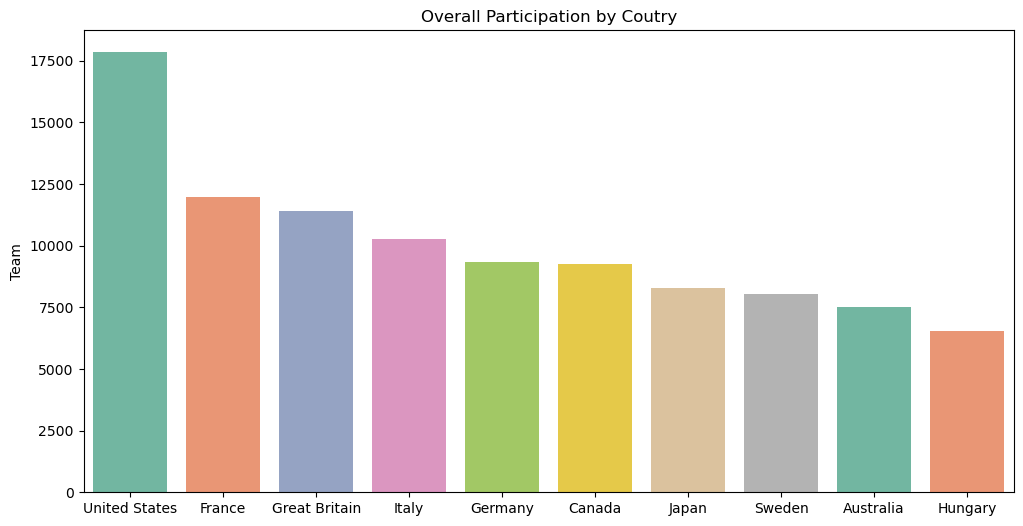

In [13]:
# Plotting for the top 10 countries

plt.figure(figsize = (12,6))
plt.title("Overall Participation by Coutry")
sns.barplot(x = top_10_countries.index, y = top_10_countries, palette = 'Set2');

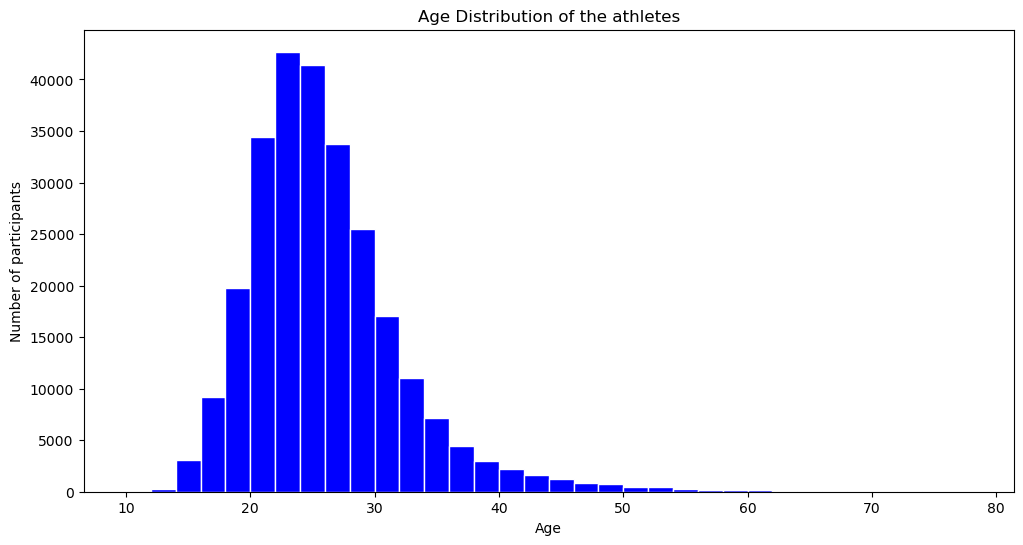

In [14]:
# Age distribution of Participants

plt.figure(figsize = (12,6))
plt.title("Age Distribution of the athletes")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(athletes_df.Age, bins = np.arange(10,80,2), color = 'blue', edgecolor = 'white');

In [15]:
# Winter Olympics sports

winter_sports = athletes_df[athletes_df.Season == 'Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [16]:
# Summer Olympics sports

summer_sports = athletes_df[athletes_df.Season == 'Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [17]:
# Male and Female participants

gender_counts = athletes_df["Sex"].value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

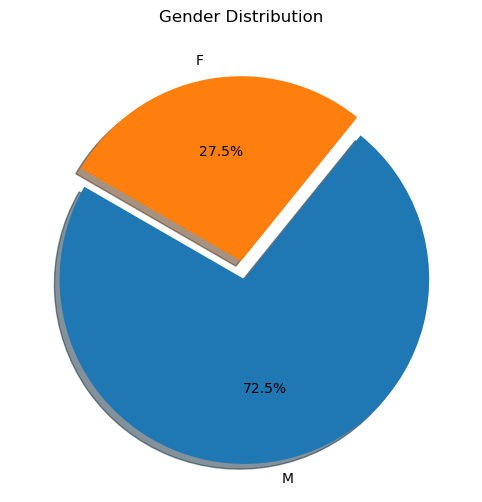

In [18]:
# Pie Chart for male and female athletes
explode = (0.1,0)
plt.figure(figsize = (12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts, explode = explode, labels = gender_counts.index, autopct = '%1.1f%%', startangle = 150, shadow = True);

In [19]:
# Total Medals

total_medals = athletes_df["Medal"].value_counts()
total_medals

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [20]:
# Total number of female athletes in Summer Olympics

female_participants = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.tail()

Year   Sex
23  2000  5431
24  2004  5546
25  2008  5816
26  2012  5815
27  2016  6223

In [21]:
woman_participants = athletes_df[(athletes_df.Sex == 'F') & (athletes_df.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

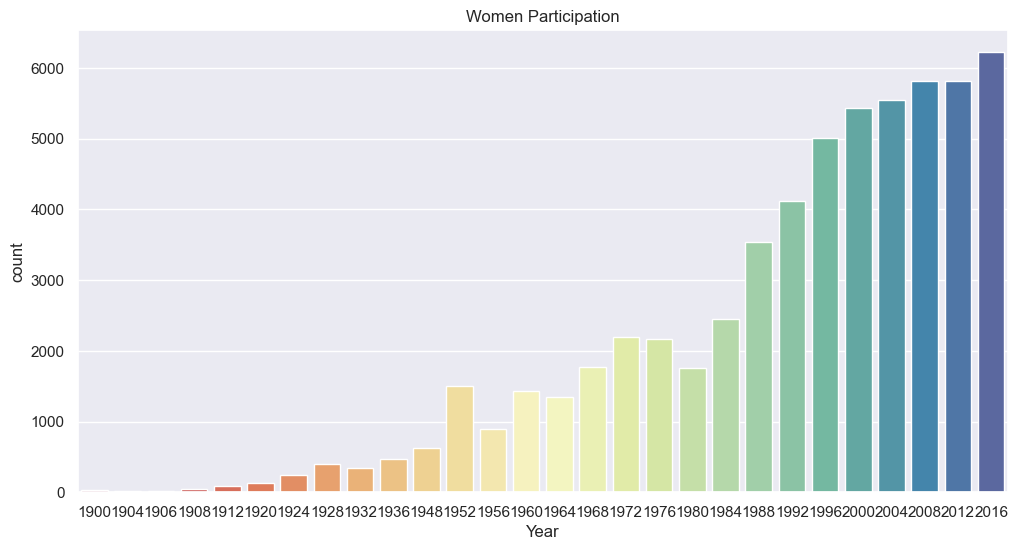

In [22]:
# Plotting the women participation rate in summer olympics

sns.set(style = 'darkgrid')
plt.figure(figsize = (12,6))
sns.countplot(x = 'Year', data = woman_participants, palette = 'Spectral')
plt.title("Women Participation")

Text(0.5, 1.0, 'Plot of Female Athletes over Time')

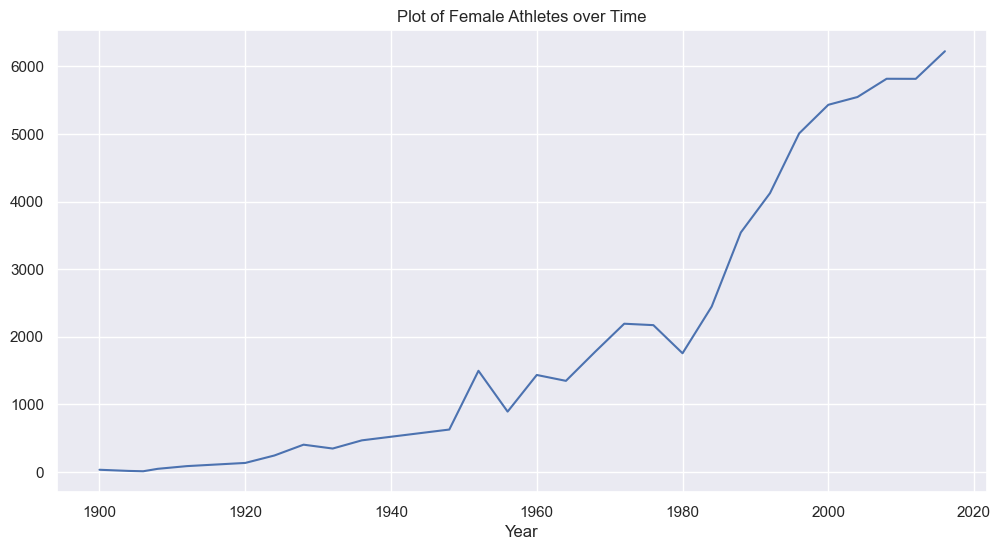

In [23]:
# Line graph

part = woman_participants.groupby('Year')['Sex'].value_counts()
plt.figure(figsize = (12,6))
part.loc[:,'F'].plot()
plt.title("Plot of Female Athletes over Time")

In [24]:
# Gold Medals Athletes

gold_medals = athletes_df[(athletes_df.Medal == 'Gold')]
gold_medals.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal   Region Notes  
3        Tug-Of-War Men's Tug-Of-War  Gold  Denmark   NaN  
42  Gymnastics Men's Team All-Around  Gold  Finland   NaN  
44      Gymnastics Men's Horse Vault  Gold  Finland   NaN  
48  Gymnastics Men's Pommelled Horse  Gold  Finland   NaN  
60       Alpine Skiing Men's Super G  Gold   Norway   NaN

In [25]:
# Taking only the values that are different from NaN

gold_medals = gold_medals[np.isfinite(gold_medals["Age"])]

In [26]:
# Athletes more than 60 years of age who have won a gold medal

gold_medals['ID'][gold_medals['Age'] > 60].count()

6

In [27]:
# For which sport this 6 gold medals have come

sport_event = gold_medals['Sport'][gold_medals['Age'] > 60]
sport_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

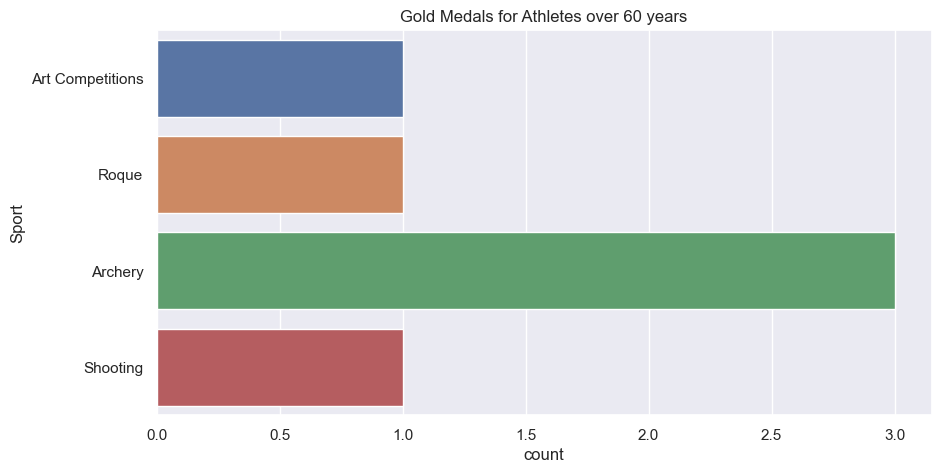

In [28]:
# Plotting for gold medals by athletes over 60 years of age

# Plotting for gold medals by athletes over 60 years of age
plt.figure(figsize=(10, 5))
plt.tight_layout()
sns.countplot(y=sport_event)
plt.title("Gold Medals for Athletes over 60 years");

In [29]:
# Total gold medals for each country

gold_medals.Region.value_counts().reset_index(name = 'Medal').head()

index  Medal
0      USA   2627
1   Russia   1599
2  Germany   1293
3       UK    657
4    Italy    567

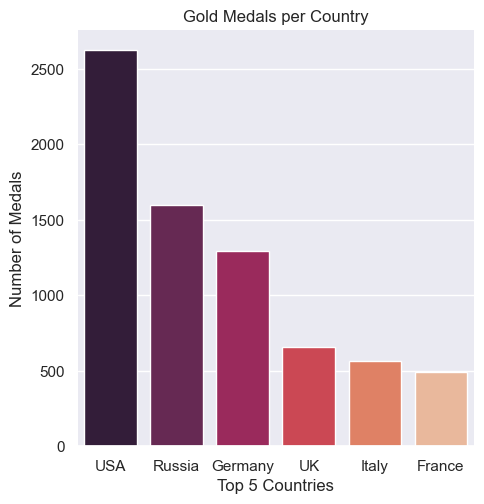

In [30]:
# Plotting for total gold medals for each country

# Plotting for total gold medals for each country
total_gold_medals = gold_medals.Region.value_counts().reset_index(name='Medal').head(6)
total_gold_medals.rename(columns={'index': 'Region'}, inplace=True)

g = sns.catplot(x='Region', y='Medal', data=total_gold_medals, height=5, kind='bar', palette='rocket')
g.despine(left=True)
g.set_xlabels("Top 5 Countries")
g.set_ylabels("Number of Medals")
plt.title("Gold Medals per Country");


In [31]:
# Rio Olympics Gold Medal Count by Teams

max_year = athletes_df.Year.max()
print(max_year)

team_names = athletes_df[(athletes_df.Year == max_year) & (athletes_df.Medal == 'Gold')].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

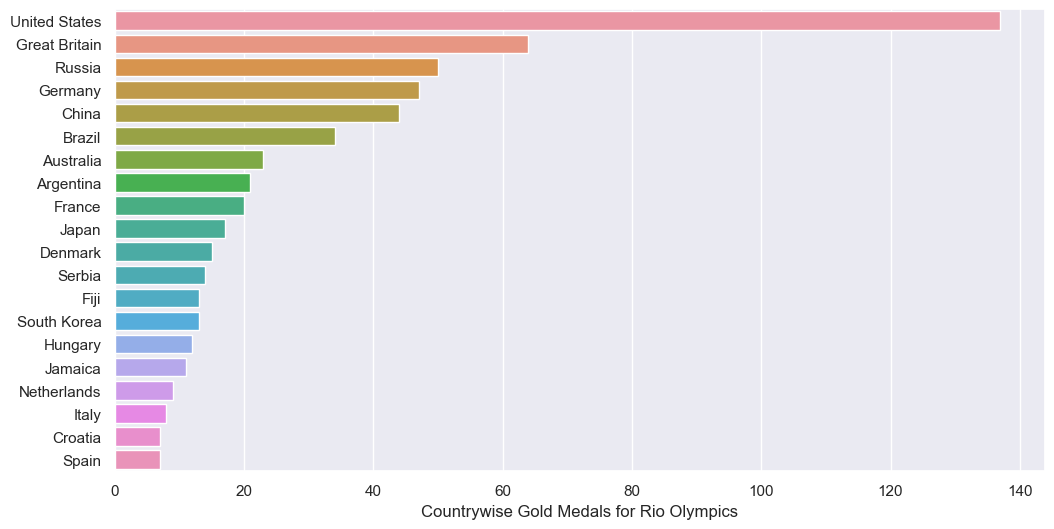

In [32]:
# Plotting the above results

plt.figure(figsize = (12,6))
sns.barplot(x = team_names.value_counts().head(20), y = team_names.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel("Countrywise Gold Medals for Rio Olympics");

In [33]:
# Height Weight comparision of Male vs Female 

not_null_medals = athletes_df[(athletes_df.Height.notnull()) &(athletes_df.Weight.notnull())]

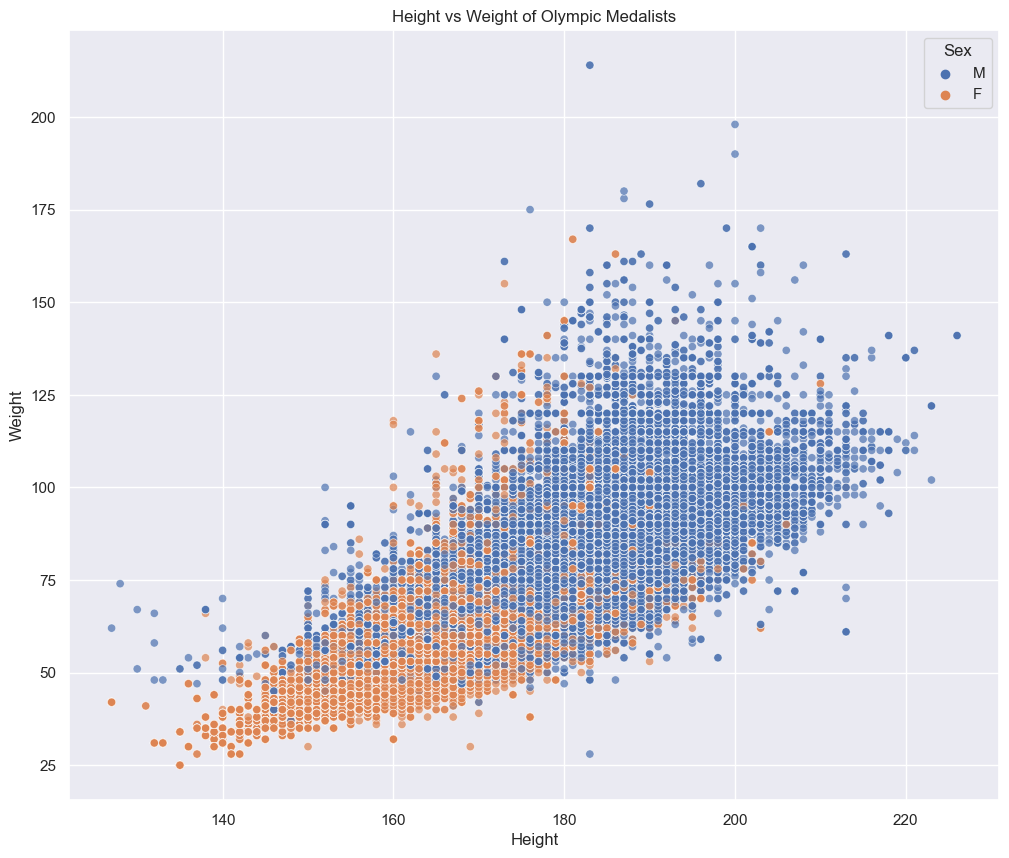

In [34]:


# Plotting the above results
plt.figure(figsize=(12, 10))
axis = sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex', alpha=0.7)
plt.title("Height vs Weight of Olympic Medalists");


In [35]:
# Youngest and Oldest Medalists
youngest_medalist = athletes_df[athletes_df['Medal'].notnull()].sort_values('Age').iloc[0]
oldest_medalist = athletes_df[athletes_df['Medal'].notnull()].sort_values('Age').iloc[-1]

print("Youngest Medalist:")
print(youngest_medalist)

print("\nOldest Medalist:")
print(oldest_medalist)


Youngest Medalist:
ID                                        71691
Name                         Dimitrios Loundras
Sex                                           M
Age                                        10.0
Height                                      NaN
Weight                                      NaN
Team              Ethnikos Gymnastikos Syllogos
NOC                                         GRE
Games                               1896 Summer
Year                                       1896
Season                                   Summer
City                                     Athina
Sport                                Gymnastics
Event     Gymnastics Men's Parallel Bars, Teams
Medal                                    Bronze
Region                                   Greece
Notes                                       NaN
Name: 142882, dtype: object

Oldest Medalist:
ID                           135239
Name                Khristos Zorbas
Sex                               M
Age        

In [36]:
# Grouping  for Age Distribution
age_distribution = athletes_df.groupby(['Sport', 'Age']).size().reset_index(name='Count')

# Plotting the Age Distribution using Plotly Express
fig = px.histogram(age_distribution, x='Age', y='Count', color='Sport',
                   title='Age Distribution in Different Sports',
                   labels={'Age': 'Age', 'Count': 'Number of Athletes'},
                   nbins=15,
                   height=600, width=1000)

fig.show()

In [37]:
#Impact of World Wars
ww_years = [1916, 1940, 1944]  # Years when Olympics were canceled due to WWI and WWII
ww_impact = athletes_df[~athletes_df['Year'].isin(ww_years)].groupby('Year').size().reset_index(name='Events')
fig = px.line(ww_impact, x='Year', y='Events', title='Impact of World Wars on Olympics',
              labels={'Year': 'Year', 'Events': 'Number of Events'},
              height=600, width=1000)

fig.show()



In [38]:
gold_medal_trends = gold_medals.groupby(['Year', 'Region']).size().reset_index(name='Gold Medals')

gold_medal_trends

Year      Region  Gold Medals
0    1896   Australia            2
1    1896     Austria            2
2    1896     Denmark            1
3    1896      France            5
4    1896     Germany           23
..    ...         ...          ...
963  2016          UK           64
964  2016         USA          139
965  2016     Ukraine            2
966  2016  Uzbekistan            4
967  2016     Vietnam            1

[968 rows x 3 columns]

In [39]:
# Display the plot
fig = px.line(gold_medal_trends, x='Year', y='Gold Medals', color='Region',
              title='Gold Medal Distribution by Country Over Time',
              labels={'Year': 'Year', 'Gold Medals': 'Number of Gold Medals'},
              height=600, width=1000)

fig.show()


In [40]:
# Grouping by Year and Sport and counting the number of athletes
event_popularity = athletes_df.groupby(['Year', 'Sport']).size().reset_index(name='Number of Athletes')

event_popularity

Year          Sport  Number of Athletes
0    1896      Athletics                 106
1    1896        Cycling                  41
2    1896        Fencing                  15
3    1896     Gymnastics                  97
4    1896       Shooting                  65
..    ...            ...                 ...
901  2016      Triathlon                 110
902  2016     Volleyball                 283
903  2016     Water Polo                 258
904  2016  Weightlifting                 255
905  2016      Wrestling                 346

[906 rows x 3 columns]

In [41]:
# Display the plot
fig = px.line(event_popularity, x='Year', y='Number of Athletes', color='Sport',
              title='Event Popularity Trends Over Time',
              labels={'Year': 'Year', 'Number of Athletes': 'Number of Athletes'},
              height=600, width=1000)

fig.show()

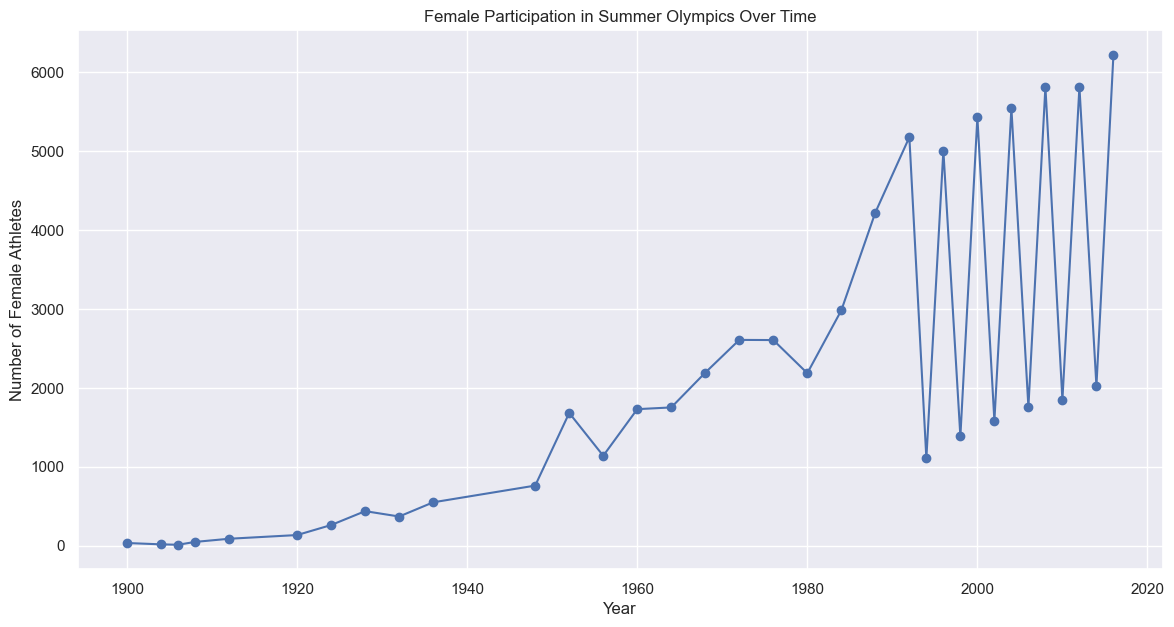

In [42]:
# Female participation trends over time
female_participation_trends = athletes_df[athletes_df['Sex'] == 'F'].groupby('Year').size()
plt.figure(figsize=(14,7))
plt.plot(female_participation_trends, marker='o')
plt.title('Female Participation in Summer Olympics Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Female Athletes')
plt.grid(True)
plt.show()


In [43]:
# Grouping by Sex and Medal, then counting the occurrences
medal_gender_distribution = athletes_df.groupby(['Sex', 'Medal']).size().reset_index(name='Count')

# Display the plot
fig = px.bar(medal_gender_distribution, x='Sex', y='Count', color='Medal', 
             title='Medal Distribution by Gender',
             labels={'Sex': 'Gender', 'Count': 'Number of Medals'},
             height=600, width=800)


fig.show()

In [44]:
# Track introduction of new sports
new_sports = athletes_df[athletes_df['Year'] >= 1990].groupby('Sport').size()
new_sports = new_sports[new_sports > 100]  
new_sports

Sport
Alpine Skiing                 4321
Archery                       1477
Athletics                    16113
Badminton                     1457
Baseball                       894
Basketball                    1948
Beach Volleyball               564
Biathlon                      3917
Bobsleigh                     1480
Boxing                        2127
Canoeing                      3339
Cross Country Skiing          5165
Curling                        447
Cycling                       4342
Diving                        1226
Equestrianism                 2458
Fencing                       2541
Figure Skating                1065
Football                      2885
Freestyle Skiing               937
Golf                           120
Gymnastics                    7652
Handball                      2286
Hockey                        2500
Ice Hockey                    2734
Judo                          2761
Luge                           781
Modern Pentathlon              477
Nordic Combine

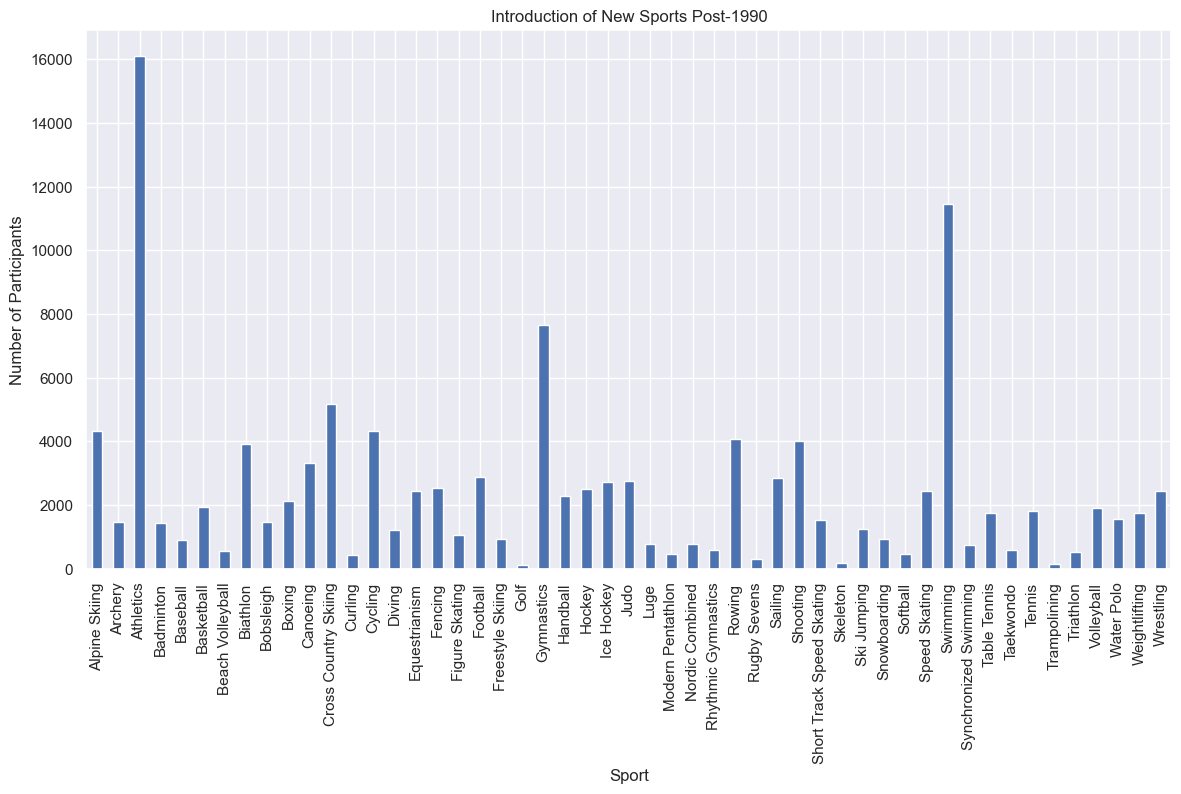

In [45]:
#plotting barcharts for the above results
new_sports.plot(kind='bar', figsize=(14,7))
plt.title('Introduction of New Sports Post-1990')
plt.ylabel('Number of Participants')
plt.show()


In [46]:
#Geographic Analysis of Medals
world_map = athletes_df[athletes_df['Medal'].notnull()].groupby('Region').size().reset_index(name='Medals')
world_map

Region  Medals
0           Afghanistan       2
1               Algeria      17
2             Argentina     274
3               Armenia      16
4             Australia    1349
..                  ...     ...
131           Venezuela      15
132             Vietnam       4
133  Virgin Islands, US       1
134              Zambia       2
135            Zimbabwe      22

[136 rows x 2 columns]

In [47]:
#plotting choropleth for the above results
fig = px.choropleth(world_map, locations='Region', locationmode='country names', color='Medals',
                    color_continuous_scale='Viridis', title='Geographic Distribution of Olympic Medals',
                    height=600, width=1000)
fig.show()

In [48]:
# Gold medal distribution by country
fig = px.bar(total_gold_medals, x='Region', y='Medal', title='Gold Medals per Country', color='Region',
             labels={'Region': 'Country', 'Medal': 'Number of Gold Medals'},
             height=600, width=1000)
fig.show()

## Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

- Based on the survey respondents' demographics, we can infer that the survey is somewhat representative of the overall programming community. However, it has fewer responses from programmers in non-English-speaking countries and women & non-binary genders.

- The programming community is not as diverse as it can be. Although things are improving, we should make more efforts to support & encourage underrepresented communities, whether in terms of age, country, race, gender, or otherwise.


- Although most programmers hold a college degree, a reasonably large percentage did not have computer science as their college major. Hence, a computer science degree isn't compulsory for learning to code or building a career in programming.

- A significant percentage of programmers either work part-time or as freelancers, which can be a great way to break into the field, especially when you're just getting started.

- Javascript & HTML/CSS are the most used programming languages in 2020, closely followed by SQL & Python.

- Python is the language most people are interested in learning - since it is an easy-to-learn general-purpose programming language well suited for various domains.

- Rust and TypeScript are the most "loved" languages in 2020, both of which have small but fast-growing communities. Python is a close third, despite already being a widely used language.

- Programmers worldwide seem to be working for around 40 hours a week on average, with slight variations by country.

- You can learn and start programming professionally at any age. You're likely to have a long and fulfilling career if you also enjoy programming as a hobby.


## References and Future Work

Check out the following resources to learn more about the dataset and tools used in this notebook:

- 120 years of Olympic history: athletes and results: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-                                                         athletes-and-results
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

